### Importante:

El primer paso para poder responder a la pregunta:

¿Cuánto de buenos son los resultados de las métricas de tu modelo? (mae,rmse,...)

Necesitas tener unas métricas con las que poder compararlas. Para ello, debes entrenar el modelo más sencillo (regresión/clasificación) para poder hacerlo. Este modelo se denomina "baseline". Con las métricas de este modelo ya puedes realizar una comparación y saber si el siguiente modelo da mejores o peores resultados.


In [1]:
import numpy as np
import sklearn.metrics as metrics
#importing the Linear Regression Algorithm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    # RMSLE es usado cuando la variable targen se ha convertido al logaritmo (por ser su valor muy grande)
    if (y_true >= 0).all() and (y_pred >= 0).all():  
        mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
        print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))  # Si se acerca a 1, habrá aprendido todos los patrones de nuestro modelo.  
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

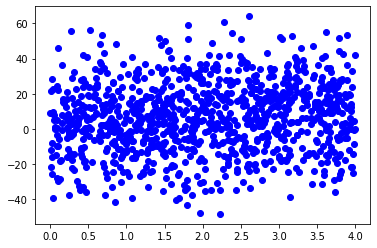

In [2]:
X = 4 * np.random.rand(1000, 1) 
X = X.reshape(-1, 1)
y = np.random.normal(2*X+2,20)
plt.scatter(X, y, color='b')

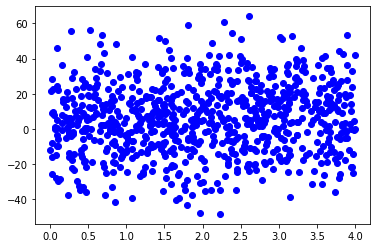

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.scatter(X_train, y_train, color='b')

In [4]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [5]:
y_real = y_train
y_pred = linear_model.predict(X)
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

In [6]:
regression_results(y_true=y_train, y_pred=y_pred_train)

explained_variance:  0.0095
r2:  0.0095
MAE:  15.7012
MSE:  387.3371
RMSE:  19.6809


In [7]:
regression_results(y_true=y_test, y_pred=y_pred_test)

explained_variance:  0.0294
r2:  0.0144
MAE:  15.3637
MSE:  361.0379
RMSE:  19.001


In [8]:
linear_model.score(X, y)

0.012955659363646177

C:\Users\xyang\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

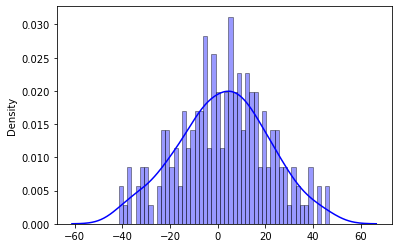

In [9]:
sns.distplot((y_test - y_pred_test), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

C:\Users\xyang\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

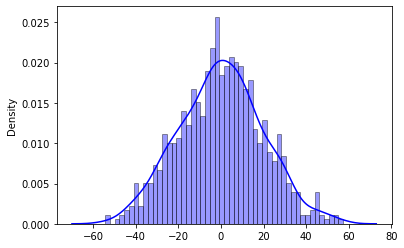

In [10]:
sns.distplot((y_train - y_pred_train), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

C:\Users\xyang\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

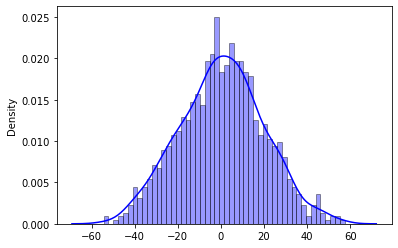

In [11]:
sns.distplot((y - y_pred), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

Varianza explicativa se parece mucho a r2
El score más alto es el mejor
Cuanto más se diferencie el RMSE del MAE peor
Cuanto más se aleja el RMSE del MAE más outliers de errores